In [1]:
pip -q install networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
def pretty_print(graph, title = "Graph Visualization",weighted = False, directed = False, heuristic = None):
    g = nx.DiGraph() if directed else nx.Graph()
    for u in graph:
        label = u
        if heuristic:
            label += "("+str(heuristic[u])+")"
        g.add_node(u, label = label)
        for v in graph[u]:
            if weighted:
                g.add_edge(u, v, weight = graph[u][v])
            else:
                g.add_edge(u, v)
    pos = nx.circular_layout(g)
    nx.draw(g, pos, 
            node_size = 1200, node_color = 'lightgreen',
            width = 1.5, edge_color = 'red',
            edgecolors = 'black', linewidths = 1.5,
            margins = 0.25, clip_on = False)
    nx.draw_networkx_labels(g, pos, labels = nx.get_node_attributes(g, 'label'),
                            font_size = 12, font_family = 'cursive')
    if weighted:
        nx.draw_networkx_edge_labels(g, pos, 
                                     edge_labels = nx.get_edge_attributes(g, 'weight'),
                                     font_size = 8, font_family = 'cursive')
    plt.suptitle(title)
    plt.axis('off')
    plt.show()
    plt.clf()

Enter Node Adjacency Pair
[PRESS ENTER TO STOP]


 1 3,4
 2 3,4,5,7,8,12
 3 1,2,12,5
 4 1,2,7,9
 5 12,3,2,7,8
 6 10,8
 7 8,5,2,4,9
 8 5,2,7,6
 9 4,7,10
 10 9,6,11
 11 10
 
Enter source and goal:  11 1


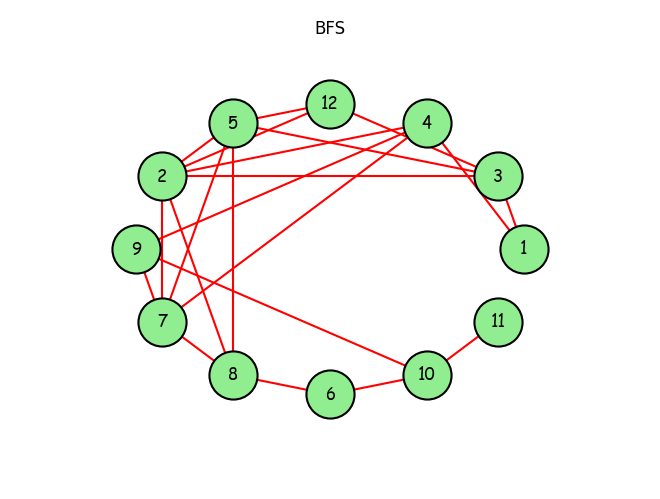

{'1': {'3', '4'}, '3': {'1', '12', '5', '2'}, '4': {'1', '9', '7', '2'}, '2': {'12', '7', '4', '5', '3', '8'}, '5': {'3', '12', '7', '2', '8'}, '12': {'5', '2', '3'}, '7': {'9', '4', '5', '2', '8'}, '8': {'5', '7', '2', '6'}, '9': {'10', '7', '4'}, '6': {'10', '8'}, '10': {'6', '11', '9'}, '11': {'10'}}
Result(BFS 11 to 1): ['11', '10', '9', '4', '1']


<Figure size 640x480 with 0 Axes>

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def display(graph, directed = False):
    g = nx.DiGraph(graph) if directed else nx.Graph(graph)
    nx.draw(g, with_labels = True)
    plt.suptitle("Breadth First Search")
    plt.show()
    plt.clf()
def print_path(node, parent):
    if node != None:
        return print_path(parent[node], parent) + [node]
    return []
def BFS(graph, start, goal):
    queue = [start]
    visited = []
    parent = {start : None}
    while queue:
        node = queue.pop(0)#First element
        visited.append(node)
        if node == goal:
            print(f"Result(BFS {start} to {goal}):",print_path(node, parent))
            return True 
        for adj in graph[node]:
            if adj not in visited and adj not in queue:
                queue.append(adj)
                parent[adj] = node
    print(f"Result(BFS {start} to {goal}): No Solution")
    return False
def get_graph(directed = False):
    graph = {}
    print("Enter Node Adjacency Pair")
    print("[PRESS ENTER TO STOP]")
    x = input()
    while x:
        x = x.split(maxsplit = 1)
        u, adj = x[0], {v.strip() for v in x[1].strip(' []').split(',') if v}
        graph[u] = graph.get(u,set()) | adj
        for v in adj:
            graph[v] = graph.get(v,set()) | ({u} if not directed else set())
        x = input()
    return graph
def example():
    graph = {"A" : ["B","C","D"],
             "B" : ["A","E"],
             "C" : ["A","E","F"],
             "D" : ["A","F"],
             "E" : ["B","G","C"],
             "F" : ["D","C","G"],
             "G" : ["E","F"]}
    #display(graph)
    pretty_print(graph, title = "BFS")
    print(graph)
    BFS(graph, "A", "F")
    
def main():
    #example();return #Uncomment to run the example
    graph = get_graph(directed = False)#undirected graph
    source, goal = input("Enter source and goal: ").split()
    #display(graph, directed = False)
    pretty_print(graph, title = "BFS")
    print(graph)
    BFS(graph, source, goal)
    
    #Sample output (Square brackets [] are optional)
    #Enter Node Adjacency Pair
    #[Press Enter To Stop]
    #A [B,C,D]
    #B [A,E]
    #C [A,E,F]
    #D [A,F]
    #E [B,G,C]
    #F [D,C,G]
    #G [E,F]

    #Enter source and goal: A F
    #Result(BFS A to F): ['A', 'C', 'F']
main()

Enter Node Adjacency Pair
[PRESS ENTER TO STOP]


 A B
 B D,C
 C A
 D A,C
 E F,G
 F B
 G F,D
 
Enter source and goal:  E B


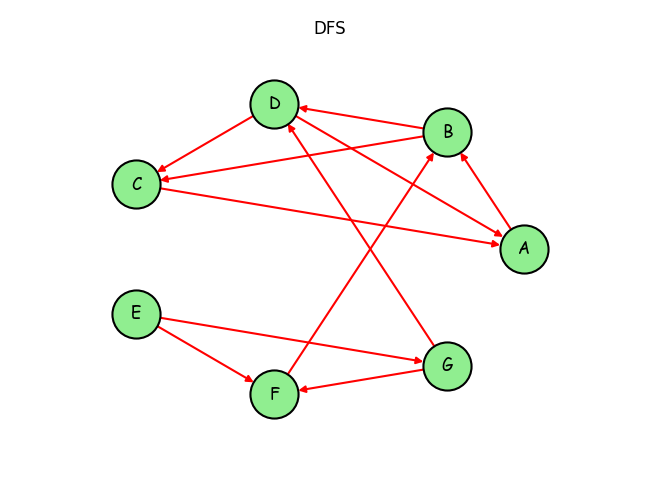

{'A': {'B'}, 'B': {'D', 'C'}, 'D': {'C', 'A'}, 'C': {'A'}, 'E': {'F', 'G'}, 'F': {'B'}, 'G': {'D', 'F'}}
Result(DFS E to B): ['E', 'G', 'D', 'A', 'B']


<Figure size 640x480 with 0 Axes>

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
def display(graph, directed = False):
    g = nx.DiGraph(graph) if directed else nx.Graph(graph)
    nx.draw(g, with_labels = True)
    plt.suptitle("Depth First Search")
    plt.show()
    plt.clf()
def print_path(node, parent):
    if node != None:
        return print_path(parent[node], parent) + [node]
    return []
def DFS(graph, start, goal):
    stack = [start]
    visited = []
    parent = {start : None}
    while stack:
        node = stack.pop()#last element
        visited.append(node)
        if node == goal:
            print(f"Result(DFS {start} to {goal}):",print_path(node, parent))
            return True
        for adj in graph[node]:
            if adj not in visited and adj not in stack:
                stack.append(adj)
                parent[adj] = node
    print(f"Result(DFS {start} to {goal}): No Solution")
    return False
def get_graph(directed = False):
    graph = {}
    print("Enter Node Adjacency Pair")
    print("[PRESS ENTER TO STOP]")
    x = input()
    while x:
        x = x.split(maxsplit = 1)
        u, adj = x[0], {v.strip() for v in x[1].strip(' []').split(',') if v}
        graph[u] = graph.get(u,set()) | adj
        for v in adj:
            graph[v] = graph.get(v,set()) | ({u} if not directed else set())
        x = input()
    return graph
def example():
    graph = {"A" : ["B","C","D"],
             "B" : ["A","E"],
             "C" : ["A","E","F"],
             "D" : ["A","F"],
             "E" : ["B","G","C"],
             "F" : ["D","C","G"],
             "G" : ["E","F"]}
    #display(graph)
    pretty_print(graph, title = "DFS")
    print(graph)
    DFS(graph, "A", "F")

def main():
    #example();return #Uncomment to run the example
    graph = get_graph(directed = True)
    source, goal = input("Enter source and goal: ").split()
    #display(graph, directed = True)
    pretty_print(graph, title = "DFS", directed = True)
    print(graph)
    DFS(graph, source, goal)

    #Sample output (Square brackets [] are optional)
    #Enter Node Adjacency Pair
    #[Press Enter To Stop]
    #A [B,C,D]
    #B [A,E]
    #C [A,E,F]
    #D [A,F]
    #E [B,G,C]
    #F [D,C,G]
    #G [E,F]

    #Enter source and goal: A F
    #Result(DFS A to F): ['A', 'C', 'F']
main()

Enter Node Adjacency Pair
[PRESS ENTER TO STOP]


 S (A,2),(C,5)
 A (G,1)
 B (A,4)
 C (A,5),(G,6)
 C (D,2)
 D (B,4),(E,3)
 E (G,3),(B,6)
 G (D,7)
 
Enter source and goal:  S G


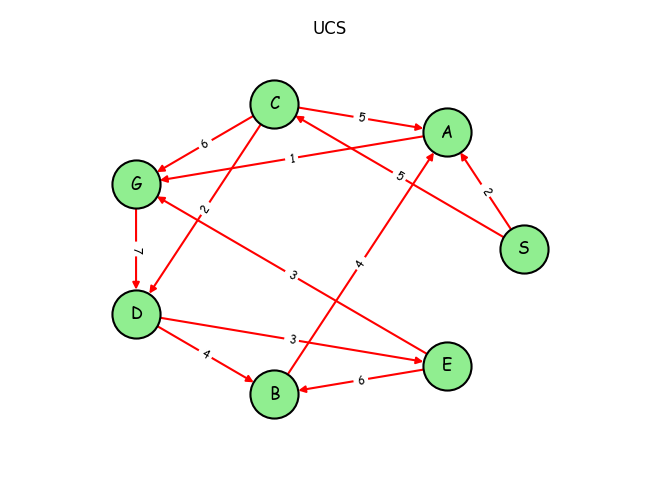

{'S': {'A': 2, 'C': 5}, 'A': {'G': 1}, 'C': {'A': 5, 'G': 6, 'D': 2}, 'G': {'D': 7}, 'B': {'A': 4}, 'D': {'B': 4, 'E': 3}, 'E': {'G': 3, 'B': 6}}
Result(UCS S to G): ['S', 'A', 'G'] Path cost = 3


<Figure size 640x480 with 0 Axes>

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
def display(graph, directed = False):
    graph = {u : {v : {'weight' : graph[u][v]} for v in graph[u]} for u in graph}
    g = nx.from_dict_of_dicts(graph)
    pos = nx.circular_layout(g)
    nx.draw(g, pos, with_labels = True)
    nx.draw_networkx_edge_labels(g, pos, edge_labels = nx.get_edge_attributes(g, 'weight'))
    plt.suptitle("Uniform Cost Search")
    plt.show()
    plt.clf()
def print_path(node, parent):
    if node != None:
        return print_path(parent[node], parent) + [node]
    return []
def UCS(graph, start, goal):
    queue = [start]
    visited = []
    parent = {start : None}
    cost = {start : 0}
    while queue:
        queue.sort(key = lambda x : cost[x])
        node = queue.pop(0)
        visited.append(node)
        if node == goal:
            print(f"Result(UCS {start} to {goal}):",print_path(node, parent),"Path cost =",cost[node])
            return True
        for adj in graph[node]:
            if adj not in visited:
                new_cost = cost[node] + graph[node][adj]
                if adj not in queue:
                    queue.append(adj)
                elif new_cost > cost[adj]:
                    continue
                cost[adj] = new_cost
                parent[adj] = node
    print(f"Result(UCS {start} to {goal}): No Solution")
    return False
def get_graph(directed = False):
    graph = {}
    print("Enter Node Adjacency Pair")
    print("[PRESS ENTER TO STOP]")
    x = input()
    while x:
        x = x.split(maxsplit = 1)
        u, adj = x[0], [v.strip(' ()') for v in x[1].strip('[]').split(',') if v] 
        adj = {v : int(w) for v, w in zip(adj[::2],adj[1::2])}
        graph[u] = graph.get(u, {}) | adj
        for v, w in adj.items():
            graph[v] = graph.get(v, {}) | ({u : w} if not directed else {})
        x = input()
    return graph
def example():
    graph = {"A" : {"B":9,"C":4,"D":7},
             "B" : {"A":9,"E":11},
             "C" : {"A":4,"E":17,"F":12},
             "D" : {"A":7,"F":14},
             "E" : {"B":11,"G":5,"C":17},
             "F" : {"D":14,"C":12,"G":9},
             "G" : {"E":5,"F":9}}
    #display(graph)
    pretty_print(graph, title = "UCS", weighted = True)
    print(graph)
    UCS(graph, "A", "G")

def main():
    #example();return #Uncomment to run the example
    graph = get_graph(directed = True)
    source, goal = input("Enter source and goal: ").split()
    #display(graph, directed = True)
    pretty_print(graph, title = "UCS", weighted = True, directed = True)
    print(graph)
    UCS(graph, source, goal)

    #Sample output (Square brackets [] are optional)
    #Enter Node Adjacency Pair
    #[Press Enter To Stop]
    #A [(B,9),(C,4),(D,7)]
    #B [(E,11)]
    #C [(E,17),(F,12)]
    #D [(F,14)]
    #E [(G,5)]
    #F [(G,9)]
 
    #Enter source and goal:  A G
    #Result(UCS A to G): ['A', 'B', 'E', 'G'] Path cost = 25
main()

Enter Node Adjacency Pair
[PRESS ENTER TO STOP]


 A B,C
 B D,E
 C F
 D G,H
 E I
 F J
 
Enter source, goal and depthlimit:  A F 2


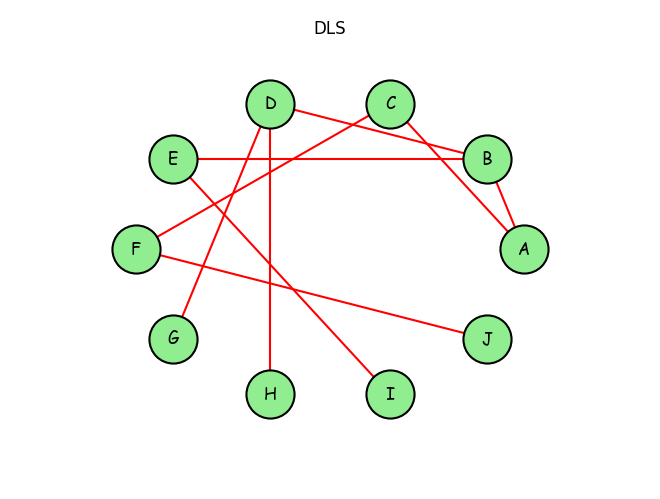

{'A': {'B', 'C'}, 'B': {'D', 'E', 'A'}, 'C': {'F', 'A'}, 'D': {'G', 'B', 'H'}, 'E': {'I', 'B'}, 'F': {'J', 'C'}, 'H': {'D'}, 'G': {'D'}, 'I': {'E'}, 'J': {'F'}}
Result(DLS A to F): ['A', 'C', 'F'] at depth limit = 2


<Figure size 640x480 with 0 Axes>

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
def display(graph, directed = False):
    g = nx.DiGraph(graph) if directed else nx.Graph(graph)
    nx.draw(g, with_labels = True)
    plt.suptitle("Depth Limited Search")
    plt.show()
    plt.clf()
def print_path(node, parent):
    if node != None:
        return print_path(parent[node], parent) + [node]
    return []
def DLS(graph, start, goal, limit):
    result = recursive_dls(graph, start, goal, limit, [start])
    print(f"Result(DLS {start} to {goal}):",result,"at depth limit =",limit)
def recursive_dls(graph, node, goal, limit, visited):
    if node == goal:
        return [node]
    elif limit == 0:
        return 'cutoff'
    else:
        status = 'failure'
        for adj in graph[node]:
            if adj not in visited:
                visited.append(adj)
                result = recursive_dls(graph, adj, goal, limit - 1, visited)
                if result == 'cutoff':
                    status = 'cutoff'
                    visited.remove(adj)
                elif result != 'failure':
                    return [node] + result
        return status
def get_graph(directed = False):
    graph = {}
    print("Enter Node Adjacency Pair")
    print("[PRESS ENTER TO STOP]")
    x = input()
    while x:
        x = x.split(maxsplit = 1)
        u, adj = x[0], {v.strip() for v in x[1].strip(' []').split(',') if v}
        graph[u] = graph.get(u,set()) | adj
        for v in adj:
            graph[v] = graph.get(v,set()) | ({u} if not directed else set())
        x = input()
    return graph
def example():
    graph = {"A" : ["B","C","D"],
             "B" : ["A","E"],
             "C" : ["A","E","F"],
             "D" : ["A","F"],
             "E" : ["B","G","C"],
             "F" : ["D","C","G"],
             "G" : ["E","F"]}
    #display(graph)
    pretty_print(graph, title = "DLS")
    print(graph)
    DLS(graph, "A", "F", 3)

def main():
    #example();return #Uncomment to run the example
    graph = get_graph(directed = False)#undirected graph
    source, goal, limit = input("Enter source, goal and depthlimit: ").split() 
    #display(graph, directed = False)
    pretty_print(graph, title = "DLS")
    print(graph)
    DLS(graph, source, goal, int(limit))

    #Sample output (Square brackets [] are optional)
    #Enter Node Adjacency Pair
    #[Press Enter To Stop]
    #A [B,C,D]
    #B [A,E]
    #C [A,E,F]
    #D [A,F]
    #E [B,G,C]
    #F [D,C,G]
    #G [E,F]

    #Enter source, goal and depthlimit:  A G 3
    #Result(DLS A to G): ['A', 'D', 'F', 'G'] at depth limit = 3
main()

Enter Node Adjacency Pair
[PRESS ENTER TO STOP]


 A B,C
 B D,E
 C F
 D G,H
 E I
 F J
 
Enter source, goal:  A F


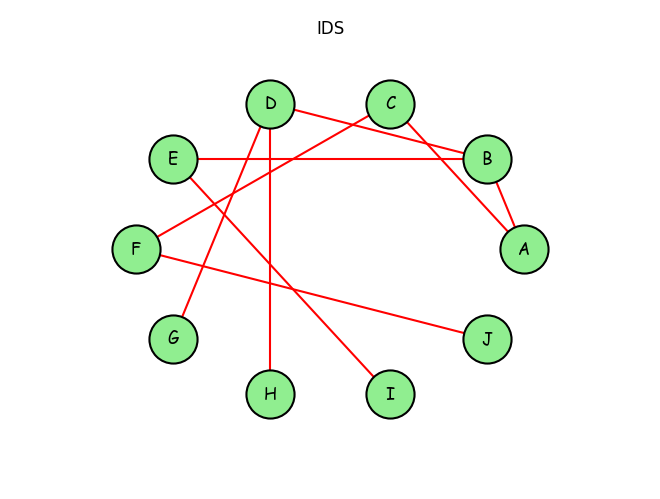

{'A': {'B', 'C'}, 'B': {'D', 'E', 'A'}, 'C': {'F', 'A'}, 'D': {'G', 'B', 'H'}, 'E': {'I', 'B'}, 'F': {'J', 'C'}, 'H': {'D'}, 'G': {'D'}, 'I': {'E'}, 'J': {'F'}}
Result(IDS/IDDFS A to F): cutoff at depth limit = 0
Result(IDS/IDDFS A to F): cutoff at depth limit = 1
Result(IDS/IDDFS A to F): ['A', 'C', 'F'] at depth limit = 2


<Figure size 640x480 with 0 Axes>

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
def display(graph, directed = False):
    g = nx.DiGraph(graph) if directed else nx.Graph(graph)
    nx.draw(g, with_labels = True)
    plt.suptitle("Iterative Deepening Depth First Search")
    plt.show()
    plt.clf()
def print_path(node, parent):
    if node != None:
        return print_path(parent[node], parent) + [node]
    return []
def IDS(graph, start, goal):
    depth = 0
    while True:
        result = recursive_dls(graph, start, goal, depth, [start])
        print(f"Result(IDS/IDDFS {start} to {goal}):",result,"at depth limit =",depth)
        if result != 'cutoff':
            return
        depth += 1
def recursive_dls(graph, node, goal, limit, visited):
    if node == goal:
        return [node]
    elif limit == 0:
        return 'cutoff'
    else:
        status = 'failure'
        for adj in graph[node]:
            if adj not in visited:
                visited.append(adj)
                result = recursive_dls(graph, adj, goal, limit - 1, visited)
                if result == 'cutoff':
                    status = 'cutoff'
                    visited.remove(adj)
                elif result != 'failure':
                    return [node] + result
        return status
def get_graph(directed = False):
    graph = {}
    print("Enter Node Adjacency Pair")
    print("[PRESS ENTER TO STOP]")
    x = input()
    while x:
        x = x.split(maxsplit = 1)
        u, adj = x[0], {v.strip() for v in x[1].strip(' []').split(',') if v}
        graph[u] = graph.get(u,set()) | adj
        for v in adj:
            graph[v] = graph.get(v,set()) | ({u} if not directed else set())
        x = input()
    return graph
def example():
    graph = {"A" : ["B","C","D"],
             "B" : ["A","E"],
             "C" : ["A","E","F"],
             "D" : ["A","F"],
             "E" : ["B","G","C"],
             "F" : ["D","C","G"],
             "G" : ["E","F"]}
    #display(graph)
    pretty_print(graph, title = "IDS")
    print(graph)
    IDS(graph, "A", "F")

def main():
    #example();return #Uncomment to run the example
    graph = get_graph(directed = False)#undirected graph
    source, goal = input("Enter source, goal: ").split() 
    #display(graph, directed = False)
    pretty_print(graph, title = "IDS")
    print(graph)
    IDS(graph, source, goal)

    #Sample output (Square brackets [] are optional)
    #Enter Node Adjacency Pair
    #[PRESS ENTER TO STOP]
    #A [B,C,D]
    #B [A,E]
    #C [A,E,F]
    #D [A,F]
    #E [B,G,C]
    #F [D,C,G]
    #G [E,F]
 
    #Enter source, goal:  A G
    #Result(IDS/IDDFS): cutoff at depth limit = 0
    #Result(IDS/IDDFS): cutoff at depth limit = 1
    #Result(IDS/IDDFS): cutoff at depth limit = 2
    #Result(IDS/IDDFS): ['A', 'C', 'E', 'G'] at depth limit = 3
main()

Enter Node Adjacency Pair
[PRESS ENTER TO STOP]


 A 21 (B,9),(C,4),(D,7)
 B 14 (E,11)
 C 18 (E,17),(F,12)
 D 18 (F,14)
 E 5 (G,5)
 F 8 (G,9)
 G 0
 
Enter source and goal:  A G


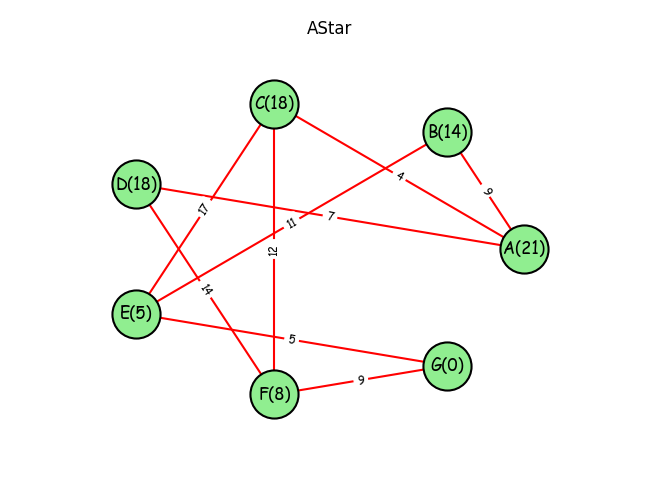

Heuristic:  {'A': 21, 'B': 14, 'C': 18, 'D': 18, 'E': 5, 'F': 8, 'G': 0}
{'A': {'B': 9, 'C': 4, 'D': 7}, 'B': {'A': 9, 'E': 11}, 'C': {'A': 4, 'E': 17, 'F': 12}, 'D': {'A': 7, 'F': 14}, 'E': {'B': 11, 'C': 17, 'G': 5}, 'F': {'C': 12, 'D': 14, 'G': 9}, 'G': {'E': 5, 'F': 9}}
Result(AStar A to G): ['A', 'B', 'E', 'G'] Path cost = 25


<Figure size 640x480 with 0 Axes>

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
def display(graph, h, directed = False):
    graph = {u+" "+str(h[u]) : {v+" "+str(h[v]) : {'weight' : graph[u][v]} for v in graph[u]} for u in graph}
    g = nx.from_dict_of_dicts(graph)
    pos = nx.circular_layout(g)
    nx.draw(g, pos, with_labels = True)
    nx.draw_networkx_edge_labels(g, pos, edge_labels = nx.get_edge_attributes(g, 'weight'))
    plt.suptitle("AStar Search")
    plt.show()
    plt.clf()
def print_path(node, parent):
    if node != None:
        return print_path(parent[node], parent) + [node]
    return []
def AStar(graph, start, goal, h):
    queue = [start]
    visited = []
    parent = {start : None}
    g = {start : 0}
    f = {start : h[start]}
    while queue:
        queue.sort(key = lambda x : f[x])
        node = queue.pop(0)
        visited.append(node)
        if node == goal:
            print(f"Result(AStar {start} to {goal}):",print_path(node, parent),"Path cost =",g[node])
            return True
        for adj in graph[node]:
            if adj not in visited:
                gcost = g[node] + graph[node][adj]
                fcost = gcost + h[adj]
                if adj not in queue:
                    queue.append(adj)
                elif fcost > f[adj]:
                    continue
                g[adj] = gcost
                f[adj] = fcost
                parent[adj] = node
    print(f"Result(AStar {start} to {goal}): No Solution")
    return False
def get_graph(directed = False):
    graph = {}
    heuristic = {}
    print("Enter Node Adjacency Pair")
    print("[PRESS ENTER TO STOP]")
    x = input()
    while x:
        x = x.split(maxsplit = 2)
        u, heuristic[u] = x[0], int(x[1])
        adj = [v.strip(' ()') for v in x[2].strip('[]').split(',') if v] if len(x) == 3 else [] 
        adj = {v : int(w) for v, w in zip(adj[::2],adj[1::2])}
        graph[u] = graph.get(u, {}) | adj
        for v, w in adj.items():
            graph[v] = graph.get(v, {}) | ({u : w} if not directed else {})
        x = input()
    return graph, heuristic
def example():
    graph = {"A" : {"B":9,"C":4,"D":7},
             "B" : {"A":9,"E":11},
             "C" : {"A":4,"E":17,"F":12},
             "D" : {"A":7,"F":14},
             "E" : {"B":11,"G":5,"C":17},
             "F" : {"D":14,"C":12,"G":9},
             "G" : {"E":5,"F":9}}
    heuristic = {"A":21,"B":14,"C":18,"D":18,"E":5,"F":8,"G":0}
    print("Heuristic: ",heuristic)
    print(graph)
    #display(graph, heuristic)
    pretty_print(graph, title = "AStar", weighted = True, heuristic = heuristic)
    AStar(graph, "A", "G", heuristic)

def main():
    #example();return #Uncomment to run the example
    graph, h = get_graph(directed = False)#undirected graph
    source, goal = input("Enter source and goal: ").split()
    #display(graph, h, directed = False)
    pretty_print(graph, title = "AStar", weighted = True, heuristic = h)
    print("Heuristic: ",h)
    print(graph)
    AStar(graph, source, goal, h)

    #Sample output (Square brackets [] are optional)
    #Enter Node Adjacency Pair
    #PRESS ENTER TO STOP]
    #A 21 [(B,9),(C,4),(D,7)]
    #B 14 [(E,11)]
    #C 18 [(E,17),(F,12)]
    #D 18 [(F,14)]
    #E 5 [(G,5)]
    #F 8 [(G,9)]
    #G 0 []
 
    #Enter source and goal:  A G
    #Result(AStar A to G): ['A', 'B', 'E', 'G'] Path cost = 25
main()

Enter Node Adjacency Pair
[PRESS ENTER TO STOP]


 A 21 (B,9)
 A 21 (C,4)
 A 21 (D,7)
 B 14 (E,11)
 C 18 (E,17)
 C 18 (F,12)
 D 18 (F,14)
 E 5 (G,5)
 F 8 (G,9)
 G 0
 
Enter source and goal:  A G


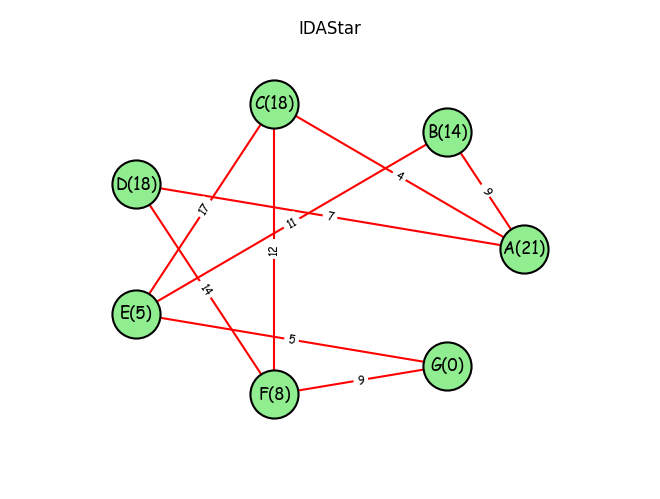

Heuristic:  {'A': 21, 'B': 14, 'C': 18, 'D': 18, 'E': 5, 'F': 8, 'G': 0}
{'A': {'B': 9, 'C': 4, 'D': 7}, 'B': {'A': 9, 'E': 11}, 'C': {'A': 4, 'E': 17, 'F': 12}, 'D': {'A': 7, 'F': 14}, 'E': {'B': 11, 'C': 17, 'G': 5}, 'F': {'C': 12, 'D': 14, 'G': 9}, 'G': {'E': 5, 'F': 9}}
Result(IDAStar A to G): ['A', 'B', 'E', 'G'] Path cost = 25


<Figure size 640x480 with 0 Axes>

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
def display(graph, h, directed = False):
    graph = {u+" "+str(h[u]) : {v+" "+str(h[v]) : {'weight' : graph[u][v]} for v in graph[u]} for u in graph}
    g = nx.from_dict_of_dicts(graph)
    pos = nx.circular_layout(g)
    nx.draw(g, pos, with_labels = True)
    nx.draw_networkx_edge_labels(g, pos, edge_labels = nx.get_edge_attributes(g, 'weight'))
    plt.suptitle("IDAStar Search")
    plt.show()
    plt.clf()
def print_path(node, parent):
    if node != None:
        return print_path(parent[node], parent) + [node]
    return []
INF = float('inf')
def IDAStar(graph, start, goal, h):    
    parent = {start : None}    
    th = h[start]
    while True:
        result, new_th = recursive_dfs(graph, parent, start, goal, 0, h, th)
        if result is not None:
            result = print_path(result, parent)
            cost = sum([graph[n1][n2] for n1, n2 in zip(result,result[1:])])
            print(f"Result(IDAStar {start} to {goal}):",result,"Path cost =",cost)
            return
        elif new_th == INF:
            print(f"Result(IDAStar {start} to {goal}): failure")
            return
        th = new_th
def recursive_dfs(graph, parent, node, goal, g, h, th):
    f = g + h[node]
    if f > th:
        return None, f
    if node == goal:
        return node, f
    min_th = INF
    for adj in graph[node]:
        result, temp_th = recursive_dfs(graph, parent, adj, goal, g + graph[node][adj], h, th)
        if result is not None:
            parent[adj] = node
            return result, temp_th
        elif temp_th < min_th:
            min_th = temp_th
    return None, min_th
def get_graph(directed = False):
    graph = {}
    heuristic = {}
    print("Enter Node Adjacency Pair")
    print("[PRESS ENTER TO STOP]")
    x = input()
    while x:
        x = x.split(maxsplit = 2)
        u, heuristic[u] = x[0], int(x[1])
        adj = [v.strip(' ()') for v in x[2].strip('[]').split(',') if v] if len(x) == 3 else [] 
        adj = {v : int(w) for v, w in zip(adj[::2],adj[1::2])}
        graph[u] = graph.get(u, {}) | adj
        for v, w in adj.items():
            graph[v] = graph.get(v, {}) | ({u : w} if not directed else {})
        x = input()
    return graph, heuristic
def example():
    graph = {"A" : {"B":9,"C":4,"D":7},
             "B" : {"A":9,"E":11},
             "C" : {"A":4,"E":17,"F":12},
             "D" : {"A":7,"F":14},
             "E" : {"B":11,"G":5,"C":17},
             "F" : {"D":14,"C":12,"G":9},
             "G" : {"E":5,"F":9}}
    heuristic = {"A":21,"B":14,"C":18,"D":18,"E":5,"F":8,"G":0}
    print("Heuristic: ",heuristic)
    print(graph)
    #display(graph, heuristic)
    pretty_print(graph, title = "IDAStar", weighted = True, heuristic = heuristic)
    IDAStar(graph, "A", "G", heuristic)

def main():
    #example();return #Uncomment to run the example
    graph, h = get_graph(directed = False)#undirected graph
    source, goal = input("Enter source and goal: ").split()
    #display(graph, h, directed = False)
    pretty_print(graph, title = "IDAStar", weighted = True, heuristic = h)
    print("Heuristic: ",h)
    print(graph)
    IDAStar(graph, source, goal, h)

    #Sample output (Square brackets [] are optional)
    #Enter Node Adjacency Pair
    #PRESS ENTER TO STOP]
    #A 21 [(B,9),(C,4),(D,7)]
    #B 14 [(E,11)]
    #C 18 [(E,17),(F,12)]
    #D 18 [(F,14)]
    #E 5 [(G,5)]
    #F 8 [(G,9)]
    #G 0 []
 
    #Enter source and goal:  A G
    #Result(IDAStar A to G): ['A', 'B', 'E', 'G'] Path cost = 25
main()

Enter Node Adjacency Pair
[PRESS ENTER TO STOP]


 A 21 (B,9),(C,4),(D,7)
 B 14 (E,11)
 C 18 (E,17),(F,12)
 D 18 (F,14)
 E 5 (G,5)
 F 8 (G,9)
 G 0
 
Enter source and goal and bound:  A G 4


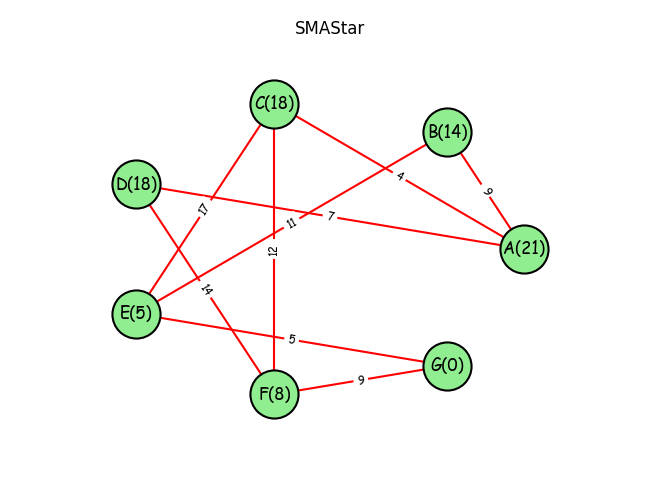

Heuristic:  {'A': 21, 'B': 14, 'C': 18, 'D': 18, 'E': 5, 'F': 8, 'G': 0}
{'A': {'B': 9, 'C': 4, 'D': 7}, 'B': {'A': 9, 'E': 11}, 'C': {'A': 4, 'E': 17, 'F': 12}, 'D': {'A': 7, 'F': 14}, 'E': {'B': 11, 'C': 17, 'G': 5}, 'F': {'C': 12, 'D': 14, 'G': 9}, 'G': {'E': 5, 'F': 9}}
Result(SMAStar A to G): ['A', 'C', 'F', 'G'] Path cost = 25 Bound = 4


<Figure size 640x480 with 0 Axes>

In [27]:
#not proper implementation of smastar :/ (wrong implementation)

import networkx as nx
import matplotlib.pyplot as plt
def display(graph, h, directed = False):
    graph = {u+" "+str(h[u]) : {v+" "+str(h[v]) : {'weight' : graph[u][v]} for v in graph[u]} for u in graph}
    g = nx.from_dict_of_dicts(graph)
    pos = nx.circular_layout(g)
    nx.draw(g, pos, with_labels = True)
    nx.draw_networkx_edge_labels(g, pos, edge_labels = nx.get_edge_attributes(g, 'weight'))
    plt.suptitle("SMAStar Search")
    plt.show()
    plt.clf()
def print_path(node, parent):
    if node != None:
        return print_path(parent[node], parent) + [node]
    return []
def SMAStar(graph, start, goal, h, bound):
    queue = [start]
    visited = []
    parent = {start : None}
    g = {start : 0}
    f = {start : h[start]}
    backup = {}
    while queue:
        queue.sort(key = lambda x : f[x])
        node = queue.pop(0)
        visited.append(node)
        if node == goal:
            print(f"Result(SMAStar {start} to {goal}):",print_path(node, parent),"Path cost =",g[node],"Bound =",bound)
            return True
        successors = []
        for adj in graph[node]:
            if adj in visited:
                continue
            gcost = g[node] + graph[node][adj]
            fcost = gcost + h[adj]
            if adj in queue:
                if fcost >= f[adj]:
                    continue
            elif len(queue) < bound:
                    queue.append(adj)
            else:
                worst = max(queue, key = lambda x : f[x])
                if fcost < f[worst]:
                    backup[worst] = f[worst]
                    queue.remove(worst)
                    queue.append(adj)
                else:
                    continue
            g[adj] = gcost
            f[adj] = fcost
            parent[adj] = node
            successors.append(adj)
        if not successors and node in backup:
            f[node] = backup[node]
        elif not successors:
            f[node] = float('inf')
    print(f"Result(SMAStar {start} to {goal}): No Solution Bound = ",bound)
    return False
def get_graph(directed = False):
    graph = {}
    heuristic = {}
    print("Enter Node Adjacency Pair")
    print("[PRESS ENTER TO STOP]")
    x = input()
    while x:
        x = x.split(maxsplit = 2)
        u, heuristic[u] = x[0], int(x[1])
        adj = [v.strip(' ()') for v in x[2].strip('[]').split(',') if v] if len(x) == 3 else [] 
        adj = {v : int(w) for v, w in zip(adj[::2],adj[1::2])}
        graph[u] = graph.get(u, {}) | adj
        for v, w in adj.items():
            graph[v] = graph.get(v, {}) | ({u : w} if not directed else {})
        x = input()
    return graph, heuristic
def example():
    graph = {"A" : {"B":9,"C":4,"D":7},
             "B" : {"A":9,"E":11},
             "C" : {"A":4,"E":17,"F":12},
             "D" : {"A":7,"F":14},
             "E" : {"B":11,"G":5,"C":17},
             "F" : {"D":14,"C":12,"G":9},
             "G" : {"E":5,"F":9}}
    heuristic = {"A":21,"B":14,"C":18,"D":18,"E":5,"F":8,"G":0}
    print("Heuristic: ",heuristic)
    print(graph)
    #display(graph, heuristic)
    pretty_print(graph, title = "SMAStar", weighted = True, heuristic = heuristic)
    SMAStar(graph, "A", "G", heuristic, 4)

def main():
    #example();return #Uncomment to run the example
    graph, h = get_graph(directed = False)#undirected graph
    source, goal, bound = input("Enter source and goal and bound: ").split()
    #display(graph, h, directed = False)
    pretty_print(graph, title = "SMAStar", weighted = True, heuristic = h)
    print("Heuristic: ",h)
    print(graph)
    SMAStar(graph, source, goal, h, int(bound))

    #Sample output (Square brackets [] are optional)
    #Enter Node Adjacency Pair
    #PRESS ENTER TO STOP]
    #A 21 [(B,9),(C,4),(D,7)]
    #B 14 [(E,11)]
    #C 18 [(E,17),(F,12)]
    #D 18 [(F,14)]
    #E 5 [(G,5)]
    #F 8 [(G,9)]
    #G 0 []
 
    #Enter source and goal and bound:  A G 4
    #Result(SMAStar A to G): ['A', 'C', 'F', 'G'] Path cost = 25 Bound = 4
main()

In [29]:
from random import randint as rint
n = 8
def show(b):
    board = [['_'] * n for _ in range(n)]
    for i in range(n):
        board[int(b[i])-1][i] = 'Q'
    print(f" {' '.join(['_']*n)}")
    for i in board:
        print(f"|{'|'.join(i)}|")
def mutate(b1, b2):
    b1, b2 = list(b1), list(b2)
    x, y = rint(0,n-1), rint(0,n-1)
    b1[x], b2[x] = b2[x], b1[x]
    b1[y] = str(int(y) + 1)
    return (''.join(b1),''.join(b2))
def crossover(b1, b2):
    b1, b2 = list(b1), list(b2)
    x = rint(1,n-1)
    b1[0:x], b2[0:x] = b2[0:x], b1[0:x]
    return (''.join(b1), ''.join(b2))
def fitness(b):
    b = list(b)
    attacks = 0
    for i in range(n):
        for j in range(i+1, n):
            if b[i] == b[j] or abs(int(b[i]) - int(b[j])) == j - i:
                attacks += 1
    return attacks
def genetic(gen, pop):
    global n 
    n = len(pop[0])
    pq = pop
    for i in range(1,gen+1):
        pq.sort(key = lambda x : fitness(x))
        b1 = pq.pop(0)
        b2 = pq.pop(0)
        pq.clear()
        if fitness(b1) == 0:
            print("Goal State:",b1,"Generation:",i)
            show(b1)
            return
        x1, x2 = crossover(b1, b2)
        x3, x4 = crossover(b2, b1)
        pq = [x1, x2, x3, x4, *mutate(x1, x2), *mutate(x2, x1), b1, b2]
    print("Most Evolved State:",pq[0],"Generation:",i,"Attacks:",fitness(pq[0]))
    show(pq[0])

def main():
    #no of queens is inferred in genetic()
    print("Genetic Algorithm Example 1(5 Queen): ")
    genetic(1000, ["32152","24345"])
    print()
    print("Genetic Algorithm Example 2(8 Queen): ")
    genetic(1000, ["57142860","56782463"])

    #Sample output
    #Genetic Algorithm Example 1(5 Queen): 
    #Most Evolved State: 14352 Generation: 1000 Attacks: 2
    #Genetic Algorithm Example 2(8 Queen): 
    #Goal State: 57142863 Generation: 1
main()

Genetic Algorithm Example 1(5 Queen): 
Most Evolved State: 14152 Generation: 1000 Attacks: 1
 _ _ _ _ _
|Q|_|Q|_|_|
|_|_|_|_|Q|
|_|_|_|_|_|
|_|Q|_|_|_|
|_|_|_|Q|_|

Genetic Algorithm Example 2(8 Queen): 
Goal State: 57142863 Generation: 2
 _ _ _ _ _ _ _ _
|_|_|Q|_|_|_|_|_|
|_|_|_|_|Q|_|_|_|
|_|_|_|_|_|_|_|Q|
|_|_|_|Q|_|_|_|_|
|Q|_|_|_|_|_|_|_|
|_|_|_|_|_|_|Q|_|
|_|Q|_|_|_|_|_|_|
|_|_|_|_|_|Q|_|_|


In [31]:
import math
import random
def simulated_annealing(initsol, inittemp, alpha, iters):
    currsol = initsol
    cost = fcost(currsol)
    sol = currsol
    mincost = cost
    temp = inittemp
    for iteration in range(iters):
        neighbor = successors(currsol)
        ncost = fcost(neighbor)
        costdiff = ncost - cost
        if costdiff < 0 or random.random() < math.exp(-costdiff/temp):
            currsol = neighbor
            cost = ncost
            if cost < mincost:
                sol = currsol
                mincost = cost
        temp *= alpha
    return sol, mincost
def fcost(sol):
    return sum([i**2 for i in sol])
def successors(sol, step = 1.0):
    succ = [x + random.uniform(-step,step) for x in sol]
    return succ

def main():
    initsol = [300.0, 400.0]
    inittemp = 1000.0
    alpha = 0.95
    iters = 500
    
    bestsol, cost = simulated_annealing(initsol, inittemp, alpha, iters)
    print("Best Solution:",bestsol)
    print("Best Cost:",cost)

    #Sample input/output (can change due to the use of random)
    #Best Solution: [225.56303970871514, 294.69364950481685]
    #Best Cost: 137723.03194110325
main()

Best Solution: [240.8860129254914, 295.2856636162978]
Best Cost: 145219.69436045742


In [33]:
import math 
import random
def display(board):
    for row in board:
        print(' '.join(str(num) if num != 0 else '.' for num in row))
    print()
def fill(board):
    for i in range(9):
        choices = list(set(range(1,10)) - set(board[i]) - {0})
        random.shuffle(choices)
        for j in range(9):
            if board[i][j] == 0:
                board[i][j] = choices.pop()
def cost(board):
    conflicts = 0
    for n in range(9):
        row = board[n]
        col = [x[n] for x in board]
        conflicts += len(row) - len(set(row))
        conflicts += len(col) - len(set(col))
    for l in [0,3,6]:
        for k in [0,3,6]:
            block = []
            for i in range(0+l,3+l):
                for j in range(0+k,3+k):
                    block.append(board[i][j])
            conflicts += 9 - len(set(block))
    return conflicts
def successor(board, fixed):
    neighbor = [[x for x in row] for row in board]
    i = random.randint(0,8)
    cols = [j for j in range(9) if (i,j) not in fixed]
    if len(cols) >= 2:
        j1, j2 = random.sample(cols, 2)
        neighbor[i][j1], neighbor[i][j2] = neighbor[i][j2], neighbor[i][j1]
    return neighbor
def simulated_annealing(board, initial_temp = 1.0, cooling_rate = 0.99, min_temp = 0.001):
    fixed = [(x,y) for x in range(9) for y in range(9) if board[x][y] != 0]
    fill(board)
    current = best = board
    temp = initial_temp
    while temp > min_temp:
        neighbor = successor(current,fixed)
        delta = cost(neighbor) - cost(current)
        if delta < 0:
            current = neighbor
            if cost(neighbor) < cost(best):
                best = neighbor
        else:
            if random.random() < math.exp(-delta/temp):
                current = neighbor
        temp *= cooling_rate
    print(f"Sudoku ({'Best Possible State | Attacks = '+str(cost(best)) if cost(best) else 'Solved'})") 
    display(best)

def main():
    board =[[5, 3, 0, 0, 7, 0, 0, 0, 0],
            [6, 0, 0, 1, 9, 5, 0, 0, 0],
            [0, 9, 8, 0, 0, 0, 0, 6, 0],
            [8, 0, 0, 0, 6, 0, 0, 0, 3],
            [4, 0, 0, 8, 0, 3, 0, 0, 1],
            [7, 0, 0, 0, 2, 0, 0, 0, 6],
            [0, 6, 0, 0, 0, 0, 2, 8, 0],
            [0, 0, 0, 4, 1, 9, 0, 0, 5],
            [0, 0, 0, 0, 8, 0, 0, 7, 9]]
    simulated_annealing(board)                                       
main()

Sudoku (Best Possible State | Attacks = 4)
5 3 2 6 7 8 9 4 1
6 7 4 1 9 5 3 8 2
1 9 8 4 3 2 5 6 7
8 2 9 7 6 1 4 5 3
4 5 6 8 9 3 7 2 1
7 1 3 5 2 4 8 9 6
9 6 1 3 5 7 2 8 4
2 8 7 4 1 9 6 3 5
3 4 5 2 8 6 1 7 9



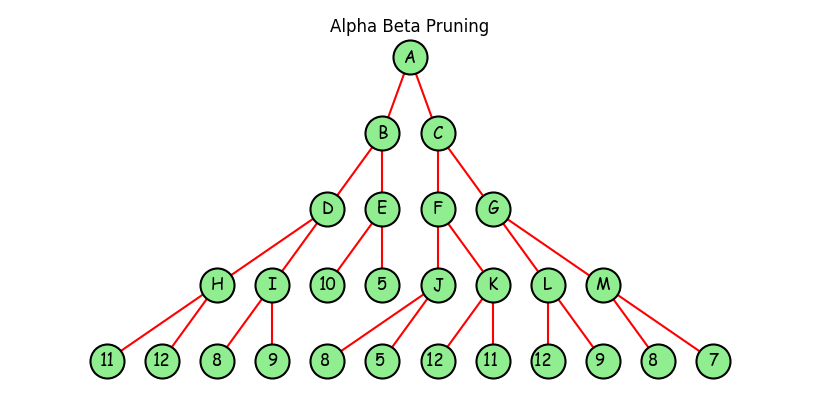

{'A': ['B', 'C'], 'B': ['D', 'E'], 'C': ['F', 'G'], 'D': ['H', 'I'], 'E': [10, 5], 'F': ['J', 'K'], 'G': ['L', 'M'], 'H': [11, 12], 'I': [8, 9], 'J': [8, 5], 'K': [12, 11], 'L': [12, 9], 'M': [8, 7]}
Alpha Beta Pruning(Maximize): 10  Pruned Branches: I-9, J-5, M-7  Path: A->B->E->10
Alpha Beta Pruning(Minimize): 8  Pruned Branches: I-9, J-5, M-7, K-11, L-9  Path: A->C->F->J->8



<Figure size 640x480 with 0 Axes>

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
def show_tree(graph):
    graph = {node : [adj for adj in graph[node]] for node in graph}
    terminal_nodes = set()
    for node in graph:
        for i in range(len(graph[node])):
            x = str(graph[node][i])
            if x.isdigit():
                while x in terminal_nodes:
                    x+=" "
                graph[node][i] = x
                terminal_nodes.add(x)
    g = nx.DiGraph(graph)
    levels = nx.single_source_shortest_path_length(g, next(iter(g.nodes)))
    layers = {}
    for node, level in levels.items():
        layers[level] = layers.get(level, []) + [node]
    pos = {}
    for level, nodes in layers.items():
        x_offset = (len(nodes) - 1)/2
        for i, node in enumerate(nodes):
            x = i - x_offset
            y = -level
            pos[node] = (x,y)
    plt.figure(figsize = (8,4))
    nx.draw(g, pos, with_labels = True, 
            node_size = 600, node_color = 'lightgreen',
            font_size = 12, font_family = 'cursive',
            arrows = False, width = 1.5, edge_color = 'red',
            edgecolors = 'black', linewidths = 1.5,
            margins = 0.1, clip_on = False)
    plt.suptitle("Alpha Beta Pruning")
    plt.show()
    plt.clf()
MIN = -float('inf')
MAX = float('inf')
def alphabeta(node, graph, ismax, pruned = [], alpha = MIN, beta = MAX, path = {}):
    if str(node).isdigit():
        return int(node), pruned, path
    option = MIN if ismax else MAX
    for child in graph[node]:
        val, _, _ = alphabeta(child, graph, not ismax, pruned, alpha, beta, path)
        if ismax:
            option = max(option, val)
            alpha = max(option, alpha)
            path[node] = alpha
        else:
            option = min(option, val)
            beta = min(option, beta)
            path[node] = beta
        if alpha >= beta:
            i = graph[node].index(child)+1
            pruned += [f"{node}-{adj}" for adj in graph[node][i:]]
            break
    return option, pruned, path
def show_path(node, graph, path, value):
    for adj in graph[node]:
        if str(adj).isdigit():
            return [node,str(value)]
        if path[adj] == value:
            return [node] + show_path(adj, graph, path, value)
            
def main():
    graph = {
        'A' : ['B', 'C'],
        'B' : ['D', 'E'],
        'C' : ['F', 'G'],
        'D' : ['H', 'I'],
        'E' : [10, 5],
        'F' : ['J', 'K'],
        'G' : ['L', 'M'],
        'H' : [11, 12],
        'I' : [8, 9],
        'J' : [8, 5],
        'K' : [12, 11],
        'L' : [12, 9],
        'M' : [8, 7]}

    show_tree(graph)
    print(graph)
    start = 'A'
    
    val, pruned, path = alphabeta(start, graph, True)#True means first node is max
    path = show_path(start, graph, path, val)
    print("Alpha Beta Pruning(Maximize):", val, " Pruned Branches:", ', '.join(pruned), " Path:",'->'.join(path))
    
    val, pruned, path = alphabeta(start, graph, False)#False means first node is min
    path = show_path(start, graph, path, val)
    print("Alpha Beta Pruning(Minimize):", val, " Pruned Branches:", ', '.join(pruned), " Path:",'->'.join(path))
    print()
    
    #Sample input/output    
    #Alpha Beta Pruning(Maximize): 10  Pruned Branches: I-9, J-5, M-7  Path: A->B->E->10
    #Alpha Beta Pruning(Minimize): 8  Pruned Branches: I-9, J-5, M-7, K-11, L-9  Path: A->C->F->J->8
main()

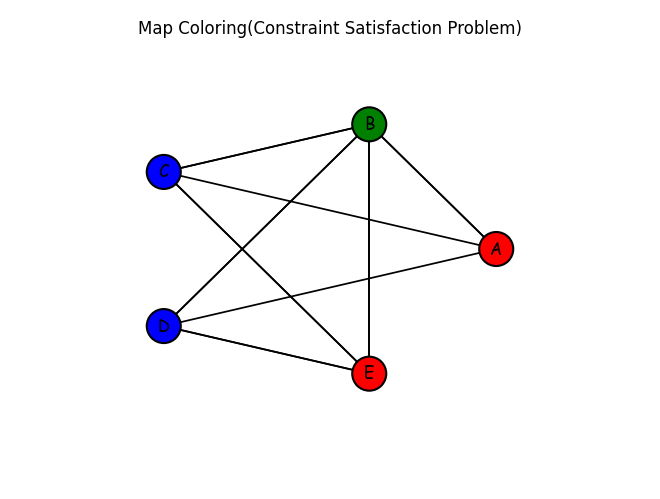

Node: A  Color: red
Node: B  Color: green
Node: C  Color: blue
Node: D  Color: blue
Node: E  Color: red


<Figure size 640x480 with 0 Axes>

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
def backtrack(graph, colors):
    assign = {node : -1 for node in graph}
    return rec_backtrack(assign, graph, colors)
def rec_backtrack(assign, graph, colors):
    if -1 not in assign.values():
        return assign
    node = [x for x in assign if assign[x] == -1][0]
    for color in colors:
        if all(assign[adj] != color for adj in graph[node]):
            assign[node] = color
            result = rec_backtrack(assign, graph, colors)
            if result:
                return result
            assign[node] = -1
    return None
def display_map(graph, colors = None):
    g = nx.DiGraph(graph)
    #nx.draw_circular(g, with_labels = True, node_color = colors)
    nx.draw_circular(g, with_labels = True,
                    node_size = 600, node_color = colors,
                    font_size = 12, font_family = 'cursive',
                    arrows = False, width = 1.25,
                    edgecolors = 'black', linewidths = 1.5,
                    margins = 0.375, clip_on = False)
    plt.suptitle("Map Coloring(Constraint Satisfaction Problem)")
    plt.show()
    plt.clf()

def main():
    graph = {
        'A' : ['B', 'C'],
        'B' : ['A', 'C', 'D', 'E'],
        'C' : ['B', 'E'],
        'D' : ['A', 'B', 'E'],
        'E' : ['B', 'C', 'D']}
    
    colors = ["red","green","blue"]
    sol = backtrack(graph, colors)
    
    if sol:
        display_map(graph, sol.values())
        for (node, color) in sol.items():
            print("Node:",node," Color:",color)
    else:
        print("No Solution Exists")
    
    #Sample Input/Output
    #Node:  A  Color: red
    #Node:  B  Color: green
    #Node:  C  Color: blue
    #Node:  D  Color: blue
    #Node:  E  Color: red
main()

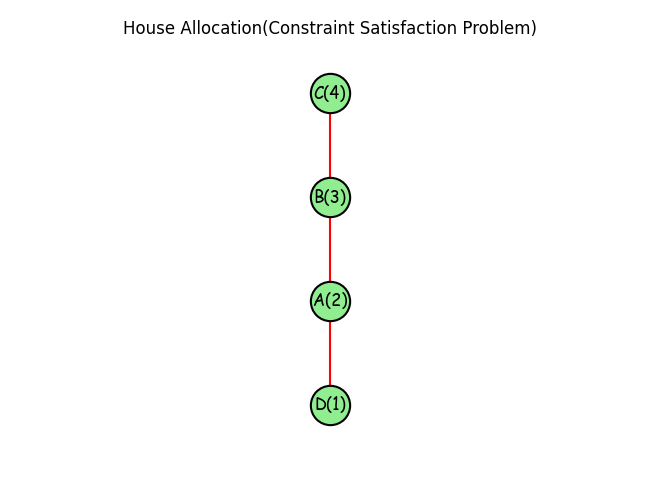

House: A  Location: 2
House: B  Location: 3
House: C  Location: 4
House: D  Location: 1


<Figure size 640x480 with 0 Axes>

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
def check(assign, loc):
    #constraints given in the question
    #change it accordinly

    a = assign['A']
    b = assign['B']
    c = assign['C']
    d = assign['D']
    
    #1. C lives in a house higher than D
    if c != -1 and d != -1 and c < d:return False

    #2. D lives next to A in Lower number House
    if d != -1 and a != -1 and (a - d) != 1:return False

    #3. There is at least one house between D and B    
    if d != -1 and b != -1 and abs(d - b) == 1:return False

    #4. C doesn't live in house number 3
    if c != -1 and c == 3:return False

    #5. B doesn't live in house number 1
    if b != -1 and b == 1:return False
        
    if loc in assign.values():
        return False
    return True
def backtrack(houses, locs):
    assign = {house : -1 for house in houses}    
    return rec_backtrack(assign, locs)
def rec_backtrack(assign, locs):
    if check(assign, -1):
        return assign
    choices = [x for x in assign if assign[x] == -1]
    house = choices[0] if choices else None
    for loc in locs:
        if check(assign, loc):
            assign[house] = loc
            res = rec_backtrack(assign, locs)
            if res:
                return res
            assign[house] = -1
    return None
def display_house(result):
    g = nx.Graph()
    nodes = list(result.keys())
    nodes.sort(key = lambda x : result[x])
    nodes = [f"{node}({result[node]})" for node in nodes]
    for u, v in zip(nodes, nodes[1:]):
        g.add_edge(u, v)
    pos = {node : (0, i) for i, node in enumerate(nodes)}
    nx.draw(g, pos, with_labels = True,
            width = 1.5, edge_color = 'red',
            node_size = 800, node_color = 'lightgreen',
            font_size = 12, font_family = 'cursive',
            edgecolors = 'black', linewidths = 1.5,
            margins = 0.2, clip_on = False)
    plt.suptitle("House Allocation(Constraint Satisfaction Problem)")
    plt.show()
    plt.clf()

def main():
    #Info: "There are 4 family namely A, B, C, D there are 4 houses namely 1,2,3,4"
    #1. C lives in a house higher than D
    #2. D lives next to A in Lower number House
    #3. There is at least one house between D and B
    #4. C doesn't live in house number 3
    #5. B doesn't live in house number 1
    locs = [1,2,3,4]
    houses = ['A','B','C','D']
    sol = backtrack(houses, locs)
    if sol:
        display_house(sol)
        for node in sol:
            print("House:",node," Location:",sol[node])
    else:
        print("No Solution Exists")

    #Sample Input/Output
    #House: A  Location: 2
    #House: B  Location: 3
    #House: C  Location: 4
    #House: D  Location: 1
main()